In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Social_Network_Ads.csv')
data.head()



,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
X=data.iloc[:,2:4].values

In [34]:
X.shape

(400, 2)

In [35]:
y=data.iloc[:,-1].values

In [36]:
y.shape

(400,)

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.20)
X_train.shape

(320, 2)

In [38]:
X_test.shape

(80, 2)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_train

array([[-2.62510411e-01,  7.96768303e-01],
       [-1.41851956e+00, -1.24508919e+00],
       [ 1.08616693e+00, -1.00835209e+00],
       [ 1.22825972e-01,  2.64109827e-01],
       [-6.47846793e-01, -1.20587960e-01],
       [-1.70752185e+00, -1.00835209e+00],
       [-1.12951727e+00,  4.71254790e-01],
       [-1.32218546e+00, -1.51141842e+00],
       [ 2.19160068e-01, -2.98140786e-01],
       [-1.32218546e+00, -1.12672064e+00],
       [ 8.93498737e-01, -1.33386560e+00],
       [ 2.04950789e+00,  2.15800663e+00],
       [-9.36849081e-01,  5.00846928e-01],
       [ 7.97164642e-01,  5.30439065e-01],
       [ 1.95317379e+00,  9.15136853e-01],
       [-9.36849081e-01, -4.46101473e-01],
       [-1.66176315e-01,  1.65494029e+00],
       [ 7.97164642e-01,  3.52886240e-01],
       [ 2.14584198e+00,  1.12228182e+00],
       [ 1.66417150e+00,  1.62534815e+00],
       [ 9.89832833e-01, -1.21549705e+00],
       [ 9.89832833e-01,  2.01004594e+00],
       [-2.62510411e-01,  5.30439065e-01],
       [-1.

In [40]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.88998609, -1.29566761],
       [-0.95933566,  0.58738358],
       [ 0.33518957, -0.26854878],
       [ 0.33518957,  0.10235524],
       [ 1.35231653,  1.30066055],
       [ 1.07491826,  0.1594174 ],
       [-0.21960696,  0.18794848],
       [-0.03467478,  1.95687536],
       [-0.68193739,  1.8998132 ],
       [ 0.15025739, -0.26854878],
       [ 1.99957914,  0.41619711],
       [ 0.15025739,  1.52890918],
       [-0.49700522, -1.43832301],
       [ 0.88998609, -0.55385957],
       [-0.31207304, -0.72504604],
       [ 0.88998609, -0.72504604],
       [-0.68193739, -1.46685408],
       [-0.77440348,  0.18794848],
       [-0.40453913,  0.01676201],
       [-0.95933566, -0.29707986],
       [-0.77440348, -1.15301222],
       [-0.03467478, -0.43973525],
       [-0.86686957, -0.69651496],
       [ 1.62971479,  1.75715781],
       [-1.05180174,  0.33060387],
       [ 0.61258783, -0.83917035],
       [ 1.35231653,  1.98540644],
       [-0.58947131,  1.41478487],
       [ 0.24272348,

In [41]:
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [42]:
k=17
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=k)

#train the model
knn.fit(X_train,y_train)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [43]:
y_pred=knn.predict(X_test)
y_pred.shape

(80,)

In [44]:
y_test.shape

(80,)

In [45]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8375

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[45,  8],
       [ 5, 22]])

In [47]:
accuracy=[]
for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    accuracy.append(accuracy_score(y_test,knn.predict(X_test)))


In [48]:
accuracy

[0.8,
 0.825,
 0.8625,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.825,
 0.8375,
 0.8375,
 0.85,
 0.85,
 0.85,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.8375,
 0.825,
 0.8375,
 0.8125,
 0.825]

In [49]:
len(accuracy)

25

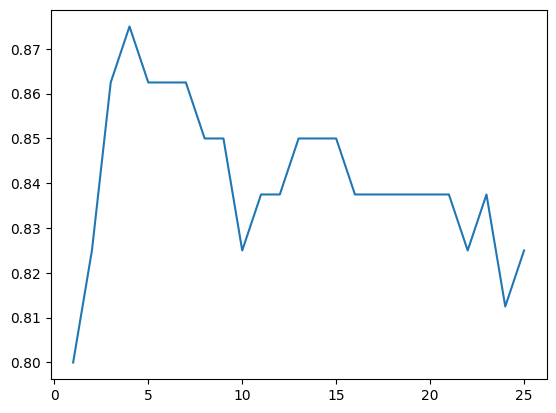

In [50]:
plt.plot(range(1,26),accuracy)

In [77]:
knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train,y_train)

,n_neighbors,4
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [ ]:
y_pred=knn.predict(X_test)
accuracy_score(y_test,y_pred)

0.875

In [53]:
def predict_output(age,salary):

    X_new= np.array([[age,salary]]).reshape(1,2)
    X_new=  scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [54]:
predict_output(45,20000)

'Will purchase'

In [55]:
x=np.array([1,2,3])
y=np.array([4,5,6,7])

np.meshgrid(x,y)


(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6],
        [7, 7, 7]]))

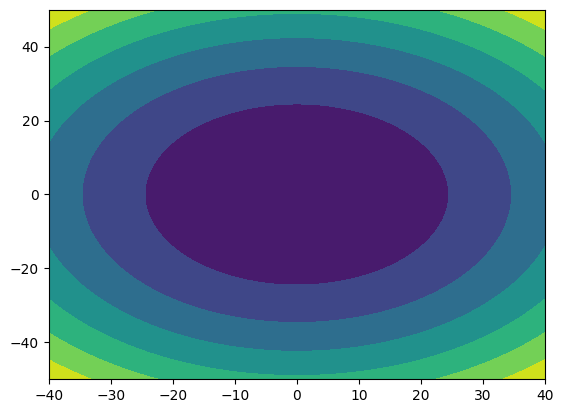

In [56]:
x=np.linspace(-40,40,100)
y=np.linspace(-50,50,90)

XX,YY=np.meshgrid(x,y)

Z=(XX**2)+(YY**2)
plt.contourf(XX,YY,Z)

In [59]:
a=np.arange(start=X_train[:,0].min()-1,stop=X_train[:,0].max()+1,step=0.01)
b=np.arange(start=X_train[:,1].min()-1,stop=X_train[:,1].max()+1,step=0.01) 

XX,YY=np.meshgrid(a,b)

In [61]:
YY.shape

(600, 605)

In [63]:
print(YY[0][0])
print(XX[0][0])

knn.predict(np.array([-2.6297869745594475,-2.9001900373585157]).reshape(1,2))

-2.6297869745594475
-2.9001900373585157


array([0])

In [71]:
input_array=np.array([XX.ravel(),YY.ravel()]).T

knn.predict(input_array)

array([0, 0, 0, ..., 1, 1, 1], shape=(363000,))

In [73]:
labels=knn.predict(input_array)
labels

array([0, 0, 0, ..., 1, 1, 1], shape=(363000,))

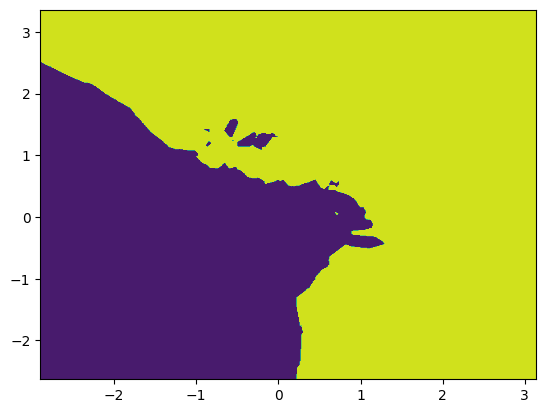

In [74]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

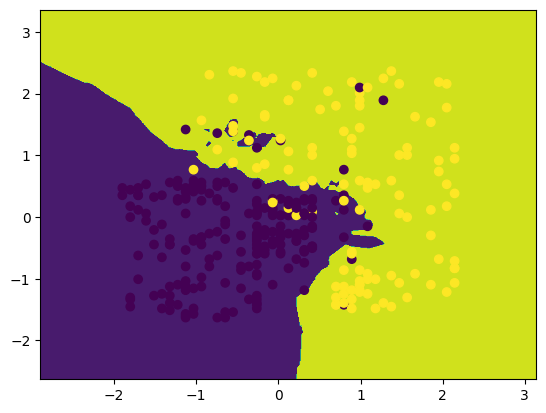

In [76]:
plt.contourf(XX,YY,labels.reshape(XX.shape))
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)